In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# import matplotlib as mpl

# mpl.rcParams['font.family'] = mpl.rcParamsDefault['font.family']

def add_stats(df):
    df['mean'] = df.mean(axis=1)
    df['range'] = df.max(axis=1)-df.min(axis=1)
    df['std'] = df.std(axis=1)

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')


def correlate():
    correlations(pred_baye['mean'], doubled_combined, 'baye_all')
    correlations(baye_val2_df['mean'], doubled_val2_df, 'baye_val2')
    correlations(baye_val3_df['mean'], doubled_val3_df, 'baye_val3')

    correlations(pred_df, doubled_combined, 'pred_all')
    correlations(pred_val2_df, doubled_val2_df, 'pred_val2')
    correlations(pred_val3_df, doubled_val3_df, 'pred_val3')

def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()
# correlate()

def do_scatter(x, y, xlabel, ylabel, title, combined):
    plt.scatter(x, y, alpha=0.2)
    sc = plt.scatter(x, y, c=combined['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
    plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def bayesian_scatter(combined, xaxis, yaxis):
    x = combined[f'{xaxis}']
    y = combined[f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted all', combined)
    
    x = combined[combined['label'] == 'val1'][f'{xaxis}']
    y = combined[combined['label'] == 'val1'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val1', combined[combined['label'] == 'val1'])
    
    x = combined[combined['label'] == 'val2'][f'{xaxis}']
    y = combined[combined['label'] == 'val2'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val2', combined[combined['label'] == 'val2'])
    
    x = combined[combined['label'] == 'val3'][f'{xaxis}']
    y = combined[combined['label'] == 'val3'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val3', combined[combined['label'] == 'val3'])


def threshold_correlate(df, stat, thresh_val):
    # example use threshold(combined, 'std', 0.2)

    # correlations on everything
    correlations(combined['mean'], combined['true'], 'all mean')
    correlations(combined[combined['label'] == 'val2']['mean'], combined[combined['label'] == 'val2']['true'], f'val2')
    correlations(combined[combined['label'] == 'val3']['mean'], combined[combined['label'] == 'val3']['true'], f'val3')
    print('\n')
    # less than filter
    filtered = df[df[stat] < thresh_val]
    correlations(filtered['mean'], filtered['true'], f'all mean<{thresh_val}')
    correlations(filtered[filtered['label'] == 'val2']['mean'], filtered[filtered['label'] == 'val2']['true'], f'val2<{thresh_val}')
    correlations(filtered[filtered['label'] == 'val3']['mean'], filtered[filtered['label'] == 'val3']['true'], f'val3<{thresh_val}')
    print('\n')
    # greater than filter
    filtered = df[df[stat] >= thresh_val]
    correlations(filtered['mean'], filtered['true'], f'all mean>={thresh_val}')
    correlations(filtered[filtered['label'] == 'val2']['mean'], filtered[filtered['label'] == 'val2']['true'], f'val2>={thresh_val}')
    correlations(filtered[filtered['label'] == 'val3']['mean'], filtered[filtered['label'] == 'val3']['true'], f'val3>={thresh_val}')

def threshold_scatter(df, stat, thresh_val):
    # example use threshold(combined, 'std', 0.2)

    # correlations on everything
    scatter(combined['mean'], combined['true'], f'True vs predicted for all', 'True', 'Predicted')
    scatter(combined[combined['label'] == 'val2']['mean'], combined[combined['label'] == 'val2']['true'], f'True vs predicted for val2', 'True', 'Predicted')
    scatter(combined[combined['label'] == 'val3']['mean'], combined[combined['label'] == 'val3']['true'], f'True vs predicted for val3', 'True', 'Predicted')
 

    # less than filter
    filtered = df[df[stat] < thresh_val]
    scatter(filtered['mean'], filtered['true'], f'True vs predicted for all < {thresh_val}', 'True', 'Predicted')
    scatter(filtered[filtered['label'] == 'val2']['mean'], filtered[filtered['label'] == 'val2']['true'], f'True vs predicted for val2 < {thresh_val}', 'True', 'Predicted')
    scatter(filtered[filtered['label'] == 'val3']['mean'], filtered[filtered['label'] == 'val3']['true'], f'True vs predicted for val3 < {thresh_val}', 'True', 'Predicted')

    # greater than filter
    filtered = df[df[stat] >= thresh_val]
    scatter(filtered['mean'], filtered['true'], f'True vs predicted for all >= {thresh_val}', 'True', 'Predicted')
    scatter(filtered[filtered['label'] == 'val2']['mean'], filtered[filtered['label'] == 'val2']['true'], f'True vs predicted for val2 >= {thresh_val}', 'True', 'Predicted')
    scatter(filtered[filtered['label'] == 'val3']['mean'], filtered[filtered['label'] == 'val3']['true'], f'True vs predicted for val3 >= {thresh_val}', 'True', 'Predicted')
    

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")    

In [2]:
macaque_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/bdbi7l3n_bayesian/activations_macaque_VAL.csv', header=None, delim_whitespace=True)
rat_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/bdbi7l3n_bayesian/activations_rat_VAL.csv', header=None, delim_whitespace=True)
cow_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/bdbi7l3n_bayesian/activations_cow_VAL.csv', header=None, delim_whitespace=True)
pig_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/bdbi7l3n_bayesian/activations_pig_VAL.csv', header=None, delim_whitespace=True)


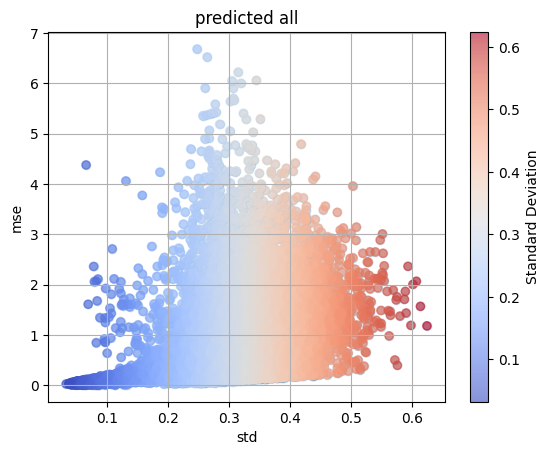

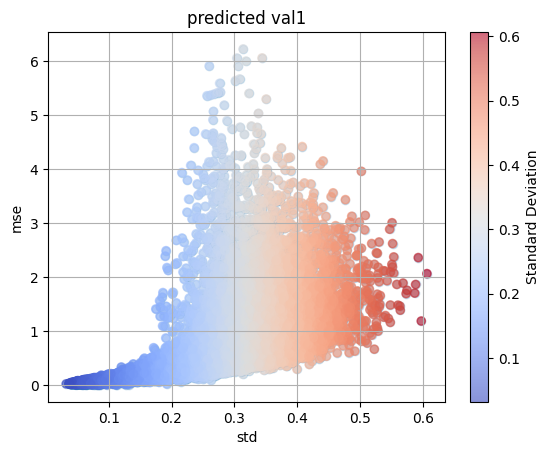

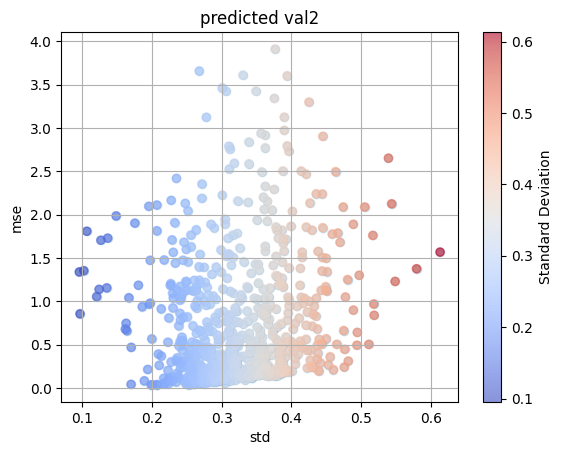

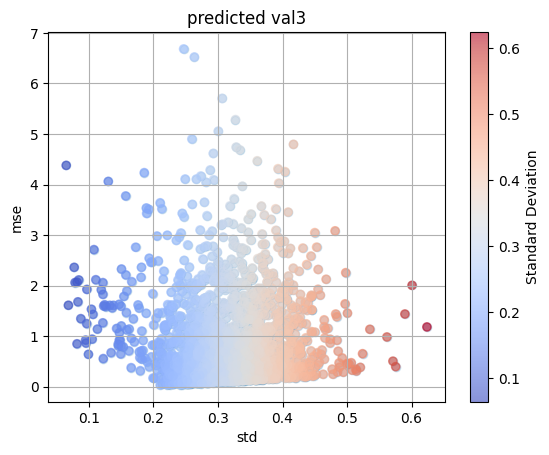

Pearson correlation coefficient for val2 macaque: 0.1655, p-value: 1.866e-05
Spearman correlation coefficient for val2 macaque: 0.2090, p-value: 5.701e-08
Pearson correlation coefficient for val3 macaque: -0.0203, p-value: 0.3931
Spearman correlation coefficient for val3 macaque: 0.0669, p-value: 0.004845


In [3]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
model='bdbi7l3n'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL.csv', header=None, delim_whitespace=True)
add_stats(pred_baye)

val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val1_df = val1_df.replace(-1, 0)
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

baye_val1_df = pred_baye.head(val1_len)
baye_val2_df = pred_baye.iloc[val1_len:val1_len + val2_len]
baye_val3_df = pred_baye.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])
doubled_combined = doubled_combined.reset_index(drop=True)

pred_df = pred_df.reset_index(drop=True)
pred_baye = pred_baye.reset_index(drop=True)

doubled_combined = doubled_combined.to_frame(name='true')

doubled_combined.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined.loc[val1_len + val2_len:, 'label'] = 'val3'

combined = pd.concat([pred_baye, doubled_combined], axis=1)

squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
combined['mse'] = squared_errors.mean(axis=1)
combined['mean_diff'] = abs(combined['mean'] - combined['true'])

# bayesian_scatter(combined, 'mean', 'std')
# bayesian_scatter(combined, 'mean', 'mse')
bayesian_scatter(combined, 'std', 'mse')

correlations(combined[combined['label']=='val2']['std'], combined[combined['label']=='val2']['mse'], 'val2 macaque')
correlations(combined[combined['label']=='val3']['std'], combined[combined['label']=='val3']['mse'], 'val3 macaque')
# bayesian_scatter(combined, 'mean_diff', 'mse')
# bayesian_scatter(combined, 'mean_diff', 'std')

# threshold_correlate(combined, 'std', 0.3)
# print('\n')
# threshold_correlate(combined, 'std', 0.4)
# threshold_scatter(combined, 'std', 0.2)

In [66]:
# plt.hist(baye_val1_df['mean'], bins=50)
# plt.show()
combined

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,mean,range,std,true,label,mse,mean_diff
0,1.131440,0.926919,0.561514,0.484319,1.324856,1.079566,0.710800,1.115605,1.248329,1.158776,...,0.892695,0.689862,0.754406,1.106153,1.349198,0.327486,0.000000,val1,1.331587,1.106153
1,1.016020,0.795193,1.172663,0.631992,1.051785,1.075099,1.003529,0.934673,1.232575,1.149865,...,1.245391,1.461597,1.299842,1.274573,1.255610,0.314922,0.000000,val1,1.725258,1.274573
2,0.314298,0.343265,0.330250,0.237424,0.214095,0.306821,0.216230,0.249239,0.251381,0.375176,...,0.406616,0.257633,0.271528,0.301431,0.425478,0.085462,0.000000,val1,0.098042,0.301431
3,0.292708,0.376817,0.395744,0.238105,0.341358,0.261931,0.224596,0.222196,0.263447,0.412258,...,0.338726,0.385958,0.230959,0.336100,0.379349,0.089136,0.000000,val1,0.121004,0.336100
4,1.047096,0.477619,0.608235,0.363728,1.059605,0.500398,0.801172,0.958935,0.783072,0.555392,...,0.324919,0.571269,0.629879,0.641939,0.944740,0.226465,0.000000,val1,0.462763,0.641939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,1.047595,0.980832,1.119830,0.904921,1.120611,1.574128,1.345958,1.336524,1.546300,1.680657,...,1.427494,1.313125,1.629020,1.365636,1.729142,0.375082,2.358652,val3,1.126931,0.993016
18104,1.687944,2.371233,1.829465,1.862801,1.446549,1.857626,1.668063,1.718619,2.480528,2.052027,...,2.310597,2.038727,2.276238,1.838433,2.156867,0.414535,1.717453,val3,0.187600,0.120981
18105,2.750116,1.465578,2.111020,2.046777,1.955676,1.245296,1.391953,1.677202,1.565495,1.643873,...,1.485015,1.381665,1.880759,1.665106,1.919506,0.404209,1.717453,val3,0.167682,0.052347
18106,1.693121,2.726861,2.488427,1.853879,2.398980,1.982485,1.670357,1.921613,2.269443,2.062459,...,2.489872,2.409690,1.474614,2.049268,2.160401,0.356841,2.068352,val3,0.129499,0.019084


In [2]:
if isinstance(doubled_combined, pd.Series):
    doubled_combined = doubled_combined.to_frame(name='true')

# Add a label column
doubled_combined['label'] = ''

# Now assign the labels by slice
doubled_combined.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined.loc[val1_len + val2_len:, 'label'] = 'val3'

combined = pd.concat([pred_baye.reset_index(drop=True), doubled_combined], axis=1)
std_filtered = combined[combined['std'] < 0.2]
std_filtered

val1_df = std_filtered[std_filtered['label'] == 'val1']
val2_df = std_filtered[std_filtered['label'] == 'val2']
val3_df = std_filtered[std_filtered['label'] == 'val3']

correlations(std_filtered['mean'], std_filtered['true'], 'all_std')
correlations(val2_df['mean'], val2_df['true'], 'val2_std')
correlations(val3_df['mean'], val3_df['true'], 'val3_std')

correlations(combined['mean'], combined['true'], 'all')
correlations(combined[combined['label'] == 'val2']['mean'], combined[combined['label'] == 'val2']['true'], 'val2')
correlations(combined[combined['label'] == 'val3']['mean'], combined[combined['label'] == 'val3']['true'], 'val3')

std_filtered = combined[combined['std'] > 0.2]
std_filtered

val1_df = std_filtered[std_filtered['label'] == 'val1']
val2_df = std_filtered[std_filtered['label'] == 'val2']
val3_df = std_filtered[std_filtered['label'] == 'val3']

correlations(std_filtered['mean'], std_filtered['true'], 'all_>std')
correlations(val2_df['mean'], val2_df['true'], 'val2_>std')
correlations(val3_df['mean'], val3_df['true'], 'val3_>std')

NameError: name 'doubled_combined' is not defined

In [87]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

    print('\n')
    correlations(pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True), pd.concat([doubled_neg_df, doubled_val_df]).reset_index(drop=True), 'val pos+neg')
    correlations(pred_val_df, doubled_val_df, 'val, pos only')
    correlations(pred_train_df, doubled_train_df, 'train, pos only')
    
# species='cow'
# model='cq45eb2s'
species_list = ['macaque', 'rat', 'cow', 'pig']
# model_list = ['cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8'] 
model_list = ['cq45eb2s']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        neg = 'nonMacaque_liver_andRat_andCow_andPig_VAL_500bp.bed'
        if species == 'rat':
            neg = 'nonRat_liver_andMacaque_andCow_andPig_VAL_500bp.bed'
        elif species == 'cow':
            neg = 'nonCow_liver_andMacaque_andRat_andPig_VAL_500bp.bed'
        elif species == 'pig':
            neg = 'nonPig_liver_andMacaque_andRat_andCow_VAL_500bp.bed'
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_FOLDCHANGE.csv', header=None)
        
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        val3_len = 2*len(val3_df)
        
        # input sanity check
        if len(pred_df) != val1_len+val2_len+val3_len:
            print("ERROR: predictions are a different length than validation sets")
        
        doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val1_df = pred_df.head(val1_len)
        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
        pred_val3_df = pred_df.tail(val3_len)
        
        doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

        print(f'average val1 prediction: {pred_val1_df.mean()}')
        #############
        pred_val_train = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL_TRAIN.csv', header=None)
        
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/negatives/'+neg, header=None, delim_whitespace=True).iloc[:,4]
        val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(neg_df)
        val2_len = 2*len(val_df)
        val3_len = 2*len(train_df)
        
        # input sanity check
        if len(pred_val_train) != val1_len+val2_len+val3_len:
            print("ERROR: predictions are a different length than validation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_neg_df = pred_val_train.head(val1_len)
        pred_val_df = pred_val_train.iloc[val1_len:val1_len + val2_len]
        pred_train_df = pred_val_train.tail(val3_len)
        
        doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df])

        print(f'average neg val prediction: {pred_neg_df.mean()}')
        correlate()


# def plotscatter():
#     # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
#     scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
#     scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')
#     scatter(pred_val_df, doubled_val_df, 'True vs predicted for val', 'True', 'Predicted')
#     scatter(pred_train_df, doubled_train_df, 'True vs predicted for train', 'True', 'Predicted')

# def ploth():
#     histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
#     histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
#     histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

#     histogram(pred_neg_df, 'negative val predictions', 'Predicted signal')
#     histogram(pred_val_df, 'positive val predictions', 'Predicted signal')
#     histogram(pred_train_df, 'train predictions', 'Predicted signal')
    

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()



macaque

cq45eb2s
average val1 prediction: 0    0.337227
dtype: float64
average neg val prediction: 0    0.41247
dtype: float64
Pearson correlation coefficient for all: 0.6511, p-value: 0
Spearman correlation coefficient for all: 0.4873, p-value: 0
Pearson correlation coefficient for val2: 0.5611, p-value: 3.593e-56
Spearman correlation coefficient for val2: 0.5119, p-value: 1.742e-45
Pearson correlation coefficient for val3: 0.4660, p-value: 2.459e-96
Spearman correlation coefficient for val3: 0.4606, p-value: 7.298e-94


Pearson correlation coefficient for val pos+neg: 0.7009, p-value: 0
Spearman correlation coefficient for val pos+neg: 0.7102, p-value: 0
Pearson correlation coefficient for val, pos only: 0.4978, p-value: 2.899e-223
Spearman correlation coefficient for val, pos only: 0.4853, p-value: 9.404e-211
Pearson correlation coefficient for train, pos only: 0.5665, p-value: 0
Spearman correlation coefficient for train, pos only: 0.5592, p-value: 0

rat

cq45eb2s
average val1 p

In [5]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def correlate():
    correlations(pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True), pd.concat([doubled_neg_df, doubled_val_df]).reset_index(drop=True), 'val pos+neg')
    correlations(pred_val_df, doubled_val_df, 'val, pos only')
    correlations(pred_train_df, doubled_train_df, 'train')
    

species='mouse'
# model='bdbi7l3n'
# model_list = ['cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8'] 
model_list=['cq45eb2s']
print('mouse')
for model in model_list:
    print(f'\n {model}')

    pred_val_train_mouse = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL_TRAIN.csv', header=None, sep='\t')
    
    neg_df = pd.read_csv(f'/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(neg_df)
    val2_len = 2*len(val_df)
    val3_len = 2*len(train_df)
    
    # input sanity check
    if len(pred_val_train_mouse) != val1_len+val2_len+val3_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_neg_df = pred_val_train_mouse.head(val1_len)
    pred_val_df = pred_val_train_mouse.iloc[val1_len:val1_len + val2_len]
    pred_train_df = pred_val_train_mouse.tail(val3_len)

    pred_neg_pos_val_mouse = pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True)
    
    doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df]).reset_index(drop=True)
    mouse_combined = pd.concat([doubled_combined_val_train, pred_val_train_mouse])
    print(f'average neg val prediction: {pred_neg_df.mean()}')
    correlate()

# def plotscatter():
#     scatter(pred_val_df, doubled_val_df, 'True vs predicted for val', 'True', 'Predicted')
#     scatter(pred_train_df, doubled_train_df, 'True vs predicted for train', 'True', 'Predicted')

# def ploth():
#     histogram(pred_neg_df, 'negative val predictions', 'Predicted signal')
#     histogram(pred_val_df, 'positive val predictions', 'Predicted signal')
#     histogram(pred_train_df, 'train predictions', 'Predicted signal')
    

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()

mouse

 cq45eb2s
average neg val prediction: 0    0.428989
dtype: float64
Pearson correlation coefficient for val pos+neg: 0.7292, p-value: 0
Spearman correlation coefficient for val pos+neg: 0.6988, p-value: 0
Pearson correlation coefficient for val, pos only: 0.5972, p-value: 0
Spearman correlation coefficient for val, pos only: 0.5881, p-value: 0
Pearson correlation coefficient for train: 0.6453, p-value: 0
Spearman correlation coefficient for train: 0.6393, p-value: 0


In [4]:
mouse_combined

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
41701,0.268367
41702,1.291534
41703,1.274855
41704,1.862105


In [6]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
model='cq45eb2s'

neg = 'nonMacaque_liver_andRat_andCow_andPig_VAL_500bp.bed'
if species == 'rat':
    neg = 'nonRat_liver_andMacaque_andCow_andPig_VAL_500bp.bed'
elif species == 'cow':
    neg = 'nonCow_liver_andMacaque_andRat_andPig_VAL_500bp.bed'
elif species == 'pig':
    neg = 'nonPig_liver_andMacaque_andRat_andCow_VAL_500bp.bed'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_FOLDCHANGE.csv', header=None, sep='\t')
add_stats(pred_df)
val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True)[[3,4]]
val1_df = val1_df.replace(-1, 0)
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True)[[3,4]]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True)[[3,4]]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])
doubled_combined = doubled_combined.reset_index(drop=True)

pred_df = pred_df.reset_index(drop=True)

# doubled_combined = doubled_combined.to_frame(name='true')

doubled_combined.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined.loc[val1_len + val2_len:, 'label'] = 'val3'

doubled_combined = doubled_combined.rename(columns={3:'peak', 4:'true'})

combinedFC = pd.concat([pred_df, doubled_combined], axis=1)


squared_errors = (combinedFC.loc[:, 0:63].subtract(combinedFC['true'], axis=0)) ** 2
combinedFC['mse'] = squared_errors.mean(axis=1)
combinedFC['mean_diff'] = abs(combinedFC['mean'] - combinedFC['true'])

# bayesian_scatter(combinedFC, 'mean', 'std')
# bayesian_scatter(combinedFC, 'mean', 'mse')
# bayesian_scatter(combinedFC, 'std', 'mse')

# correlations(combinedFC[combinedFC['label']=='val2']['std'], combinedFC[combinedFC['label']=='val2']['mse'], 'val2 macaque')
# correlations(combinedFC[combinedFC['label']=='val3']['std'], combinedFC[combinedFC['label']=='val3']['mse'], 'val3 macaque')

#############
pred_val_train = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL_TRAIN.csv', header=None, sep='\t')
add_stats(pred_val_train)

neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/negatives/'+neg, header=None, delim_whitespace=True).iloc[:,4]
neg_df = neg_df.replace(-1, 0)
val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(neg_df)
val2_len = 2*len(val_df)
val3_len = 2*len(train_df)

# input sanity check
if len(pred_val_train) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_neg_df = pred_val_train.head(val1_len)
pred_val_df = pred_val_train.iloc[val1_len:val1_len + val2_len]
pred_train_df = pred_val_train.tail(val3_len)

doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df])
doubled_combined_val_train = doubled_combined_val_train.reset_index(drop=True)

pred_val_train = pred_val_train.reset_index(drop=True)

doubled_combined_val_train = doubled_combined_val_train.to_frame(name='true')

doubled_combined_val_train.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined_val_train.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined_val_train.loc[val1_len + val2_len:, 'label'] = 'val3'

combinedVT = pd.concat([pred_val_train, doubled_combined_val_train], axis=1)

squared_errors = (combinedVT.loc[:, 0:63].subtract(combinedVT['true'], axis=0)) ** 2
combinedVT['mse'] = squared_errors.mean(axis=1)
combinedVT['mean_diff'] = abs(combinedVT['mean'] - combinedVT['true'])

# bayesian_scatter(combinedVT, 'mean', 'true')
# correlations(combinedVT['mean'], combinedVT['true'], 'combinedVT')
# bayesian_scatter(combinedVT, 'mean', 'std')
# bayesian_scatter(combinedVT, 'mean', 'mse')
# bayesian_scatter(combinedVT, 'std', 'mse')

# correlations(combinedVT[combinedVT['label']=='val2']['std'], combinedVT[combinedVT['label']=='val2']['mse'], 'val2 macaque')
# correlations(combinedVT[combinedVT['label']=='val3']['std'], combinedVT[combinedVT['label']=='val3']['mse'], 'val3 macaque')


# def plotscatter():
#     # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
#     scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
#     scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')
#     scatter(pred_val_df, doubled_val_df, 'True vs predicted for val', 'True', 'Predicted')
#     scatter(pred_train_df, doubled_train_df, 'True vs predicted for train', 'True', 'Predicted')

# def ploth():
#     histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
#     histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
#     histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

#     histogram(pred_neg_df, 'negative val predictions', 'Predicted signal')
#     histogram(pred_val_df, 'positive val predictions', 'Predicted signal')
#     histogram(pred_train_df, 'train predictions', 'Predicted signal')
    
# def correlate():
#     # correlations(pred_df, doubled_combined, 'all')
#     correlations(pred_val2_df, doubled_val2_df, 'val2')
#     correlations(pred_val3_df, doubled_val3_df, 'val3')

#     print('\n')
#     correlations(pred_val_train, doubled_combined_val_train, 'val train all')
#     correlations(pred_val_df, doubled_val_df, 'val')
#     correlations(pred_train_df, doubled_train_df, 'train')
    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()
# correlate()

In [62]:
combinedFC

,0,1,2,3,4,5,6,7,8,9,...,62,63,mean,range,std,peak,true,label,mse,mean_diff
0,0.163231,0.265181,0.618294,0.430137,0.418730,0.411231,0.641239,0.165329,0.104330,0.371258,...,0.483794,0.187326,0.373491,0.877337,0.208674,peak18832,0.000000,val1,0.179815,0.373491
1,0.603810,0.246763,0.160920,0.504379,0.284747,0.453353,0.449362,0.304102,0.208537,0.159922,...,0.360797,0.286536,0.310015,0.523345,0.135622,peak18832,0.000000,val1,0.114090,0.310015
2,0.087684,0.071468,0.077264,0.104743,0.060854,0.062551,0.070045,0.088827,0.096790,0.083750,...,0.078259,0.084274,0.082097,0.099145,0.021868,peak18830,0.000000,val1,0.007221,0.082097
3,0.091729,0.066666,0.095880,0.075899,0.130144,0.069746,0.064212,0.088488,0.073431,0.068968,...,0.066816,0.062551,0.080972,0.102340,0.020954,peak18830,0.000000,val1,0.006995,0.080972
4,0.583105,0.614466,1.441493,1.385563,0.720308,1.621898,0.407458,0.783505,0.454732,0.566406,...,1.067584,1.058553,0.630848,1.502800,0.366725,peak18821,0.000000,val1,0.522858,0.630848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18103,0.613267,1.313201,1.080150,0.237954,0.639960,1.485691,1.203634,0.708421,0.539570,0.430173,...,1.154659,1.107278,0.912413,1.496483,0.363088,peak33081,2.358652,val3,2.220248,1.446238
18104,1.622161,1.655856,1.395011,2.013524,1.777620,1.564220,1.849225,1.443288,0.870198,0.744506,...,1.765537,1.386695,1.522589,1.541331,0.356124,peak71703,1.717453,val3,0.166772,0.194863
18105,1.331028,1.685914,1.915580,1.826438,1.280414,1.769413,2.180004,1.544225,1.510990,0.711443,...,1.429016,2.092566,1.582211,1.902094,0.376348,peak71703,1.717453,val3,0.160567,0.135242
18106,2.257429,2.442543,2.979572,2.954581,2.587301,2.398309,2.541476,2.235363,2.494223,2.285228,...,2.685030,2.366873,2.508583,1.005950,0.286594,peak50839,2.068352,val3,0.242478,0.440232


# of same sign for true difference and predicted difference: 189 / 319 = 0.5924764890282131 %
# of same sign for true difference and averaged predicted difference: 62 / 159.5 = 0.3887147335423197%
Pearson correlation coefficient: 0.3712, p-value: 7.364e-12
Spearman correlation coefficient: 0.3611, p-value: 2.942e-11
None


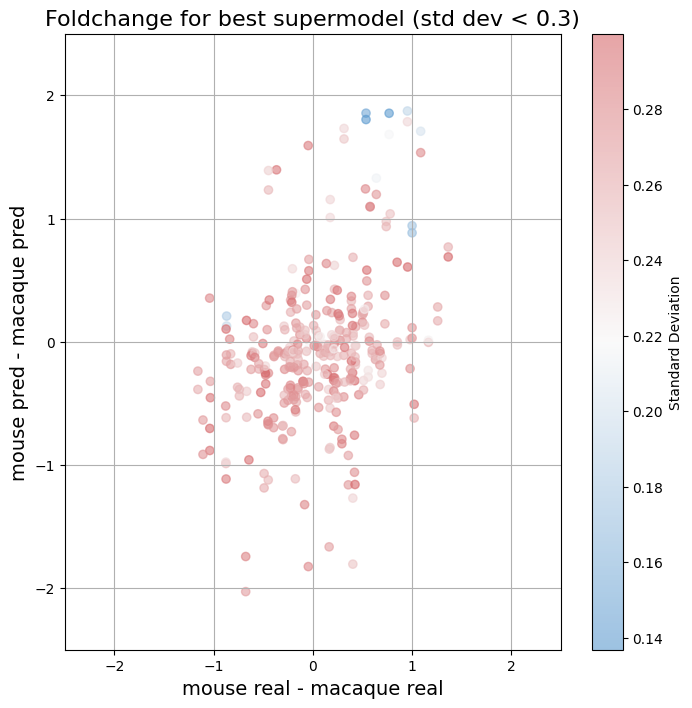

In [7]:
species = 'macaque'
# species_list = ['macaque', 'rat', 'cow', 'pig']
model = 'cq45eb2s_bayesian'

mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    
one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
pred_df = combinedFC[['mean', 'std']]
val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
# val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, sep="\t").rename(columns={0: 'mac_chr'})
    
val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
    
    ####################### make the ____ doubled predicted and true df
peaks = one_to_one_peaks[[4, 14]]
    
merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    
    # Merge the result with df3 on col13 and df3['col3']
merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    # Subtract col4 values from df2 and df3
    # merged_df['result'] = merged_df['4_mac'] - merged_df['4_mouse']
    # res = merged_df[['4', 14, '4_mac', '4_mouse', 'result']]
    # nan = res[res.isna().any(axis=1)]
    
    # nan

    ####################### 
    
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
    
doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
    
mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 'mean':'mac_pred'})
    
merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
    # m_mac_pred = merged_mac_real_pred[~merged_mac_real_pred[3].isin(nan['3_mac'])].reset_index(drop=True)
m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)

    ####################### make the mouse doubled predicted and true df

mouse_pred = pred_neg_pos_val_mouse.mean(axis=1).to_frame(name='mouse_pred')
# mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_VAL_TRAIN.csv', sep="\t", header=None)
mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/logPos/mouse_liver_VAL.narrowPeak', sep="\t", header=None)
    
real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)
    
mouse_pred_pos = mouse_pred[real_neg_len:real_neg_len+real_pos_len].reset_index(drop=True)
    
doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
    
    
doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
    
merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
    
m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)
    
    ####################### make bigboss mouse + query predicted and real info
    
bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
    
bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
    
mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
std_av = (bigboss.loc[::2, 'std'].values + bigboss.loc[1::2, 'std'].values) / 2
    
    # Add the averages back to the DataFrame as a new column
bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
bigboss.loc[::2, 'std_avg'] = std_av 
bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
    

filtered = bigboss[bigboss['std'] < 0.3]
same_sign = np.sign(filtered['true']) == np.sign(filtered['pred'])
print(f'# of same sign for true difference and predicted difference: {same_sign.sum()} / {len(filtered)} = {same_sign.sum() / len(filtered)} %')
    
same_sign = np.sign(filtered.loc[::2]['true']) == np.sign(filtered.loc[::2]['avg_pred'])
print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(filtered) / 2} = {same_sign.sum() / (len(filtered) / 2)}%')


x = filtered['true']
y = filtered['pred']

# x = filtered.loc[::2,'true']
# y = filtered.loc[::2,'pred']
    
print(pearson_spearman(x, y))

# cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#0868bb", "#d5080e"])
#89a1b6, d59698

start_color = "#5c9acf"  # a more greenish-teal blue
end_color = "#d6696c"    # warm dusty rose

# Create a modified colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_coolwarm", [start_color, "#f7f7f7", end_color]
)
plt.figure(figsize=(8, 8))
plt.axis([-2.5, 2.5, -2.5, 2.5])
sc = plt.scatter(x, y, c=filtered['std'], cmap=cmap, alpha=0.6)  # 'coolwarm' goes from blue to red
plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
# plt.scatter(x, y, alpha=0.2)
plt.xlabel(f'mouse real - {species} real', fontsize=14)
plt.ylabel(f'mouse pred - {species} pred', fontsize=14)
# plt.title(f'Foldchange diff in real vs. predicted for model: {model} std')
plt.title(f'Foldchange for best supermodel (std dev < 0.3)', fontsize=16)
plt.grid(True)
plt.show()

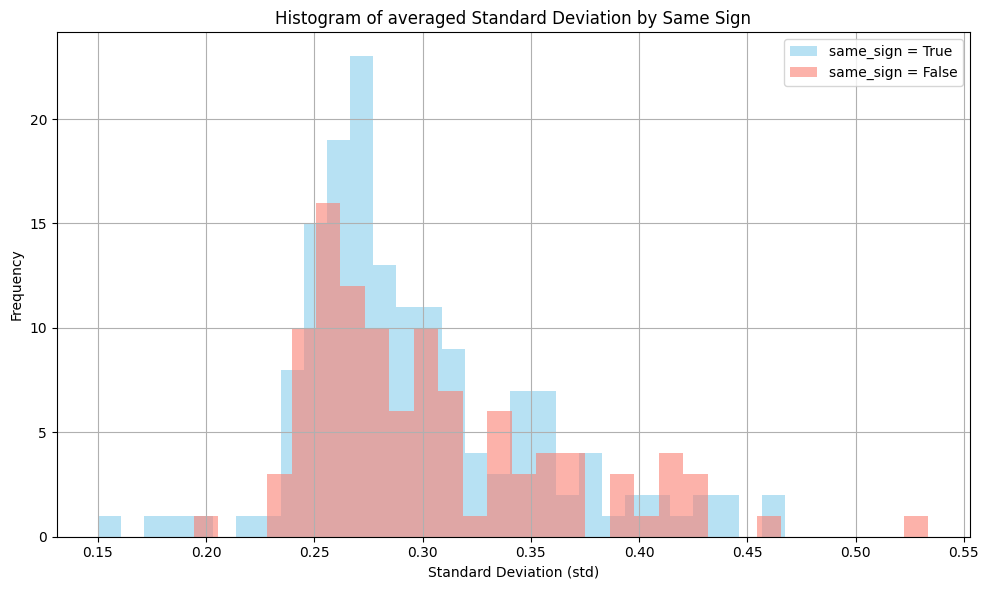

In [92]:
bigboss['same_sign'] = same_sign
df = bigboss[::2]

same = df[df['same_sign'] == True]
diff = df[df['same_sign'] == False]

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(same['std'], bins=30, alpha=0.6, label='same_sign = True', color='skyblue')
plt.hist(diff['std'], bins=30, alpha=0.6, label='same_sign = False', color='salmon')
plt.xlabel('Standard Deviation (std)')
plt.ylabel('Frequency')
plt.title('Histogram of averaged Standard Deviation by Same Sign')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# bigboss['same_sign'] = bigboss['same_sign'].fillna(method='ffill')

# # Split the DataFrame based on 'same_sign'
# same = bigboss[bigboss['same_sign'] == True]
# diff = bigboss[bigboss['same_sign'] == False]

# # Plotting histograms
# plt.figure(figsize=(10, 6))
# plt.hist(same['std'], bins=30, alpha=0.6, label='same_sign = True', color='skyblue')
# plt.hist(diff['std'], bins=30, alpha=0.6, label='same_sign = False', color='salmon')
# plt.xlabel('Standard Deviation (std)')
# plt.ylabel('Frequency')
# plt.title('Histogram of Standard Deviation by Same Sign')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# of same sign for true difference and predicted difference: 126 / 182 = 0.6923076923076923 %
# of same sign for true difference and averaged predicted difference: 63 / 91.0 = 0.6923076923076923%
Pearson correlation coefficient: 0.5283, p-value: 1.796e-14
Spearman correlation coefficient: 0.5194, p-value: 5.804e-14
None


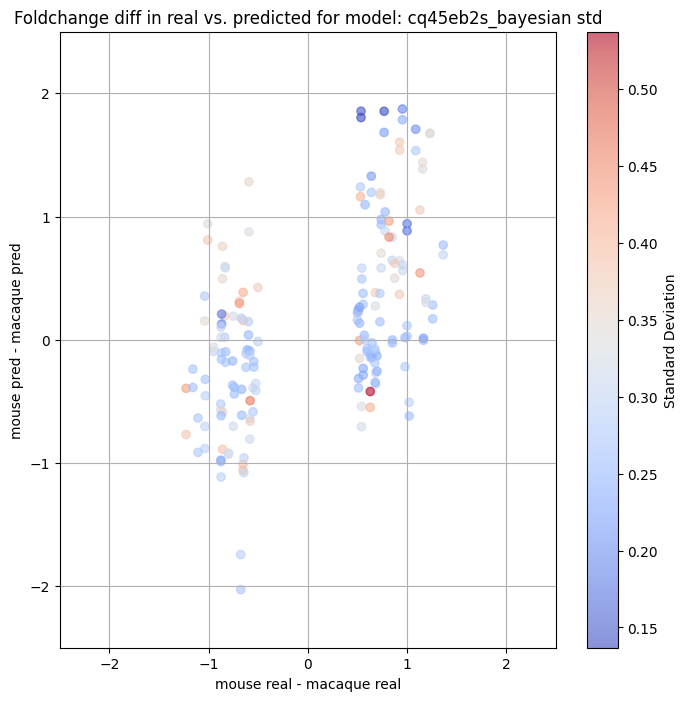

In [40]:
bigdiff = bigboss[(bigboss['true'] < -0.5) |  (bigboss['true'] > 0.5)]
df = bigdiff
x = df['true']
y = df['pred']


same_sign = np.sign(df['true']) == np.sign(df['pred'])
print(f'# of same sign for true difference and predicted difference: {same_sign.sum()} / {len(df)} = {same_sign.sum() / len(df)} %')
    
same_sign = np.sign(df.loc[::2]['true']) == np.sign(df.loc[::2]['avg_pred'])
print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(df) / 2} = {same_sign.sum() / (len(df) / 2)}%')

    
print(pearson_spearman(x, y))
    
plt.figure(figsize=(8, 8))
plt.axis([-2.5, 2.5, -2.5, 2.5])
sc = plt.scatter(x, y, c=df['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
# plt.scatter(x, y, alpha=0.2)
plt.xlabel(f'mouse real - {species} real')
plt.ylabel(f'mouse pred - {species} pred')
plt.title(f'Foldchange diff in real vs. predicted for model: {model} std')
plt.grid(True)
plt.show()

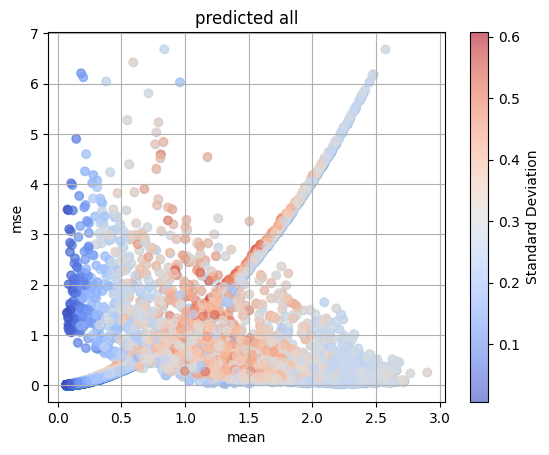

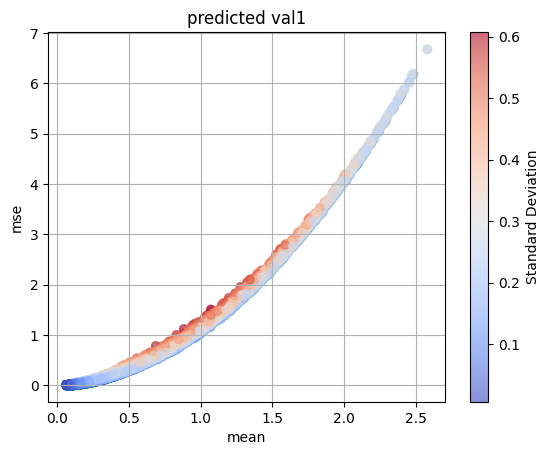

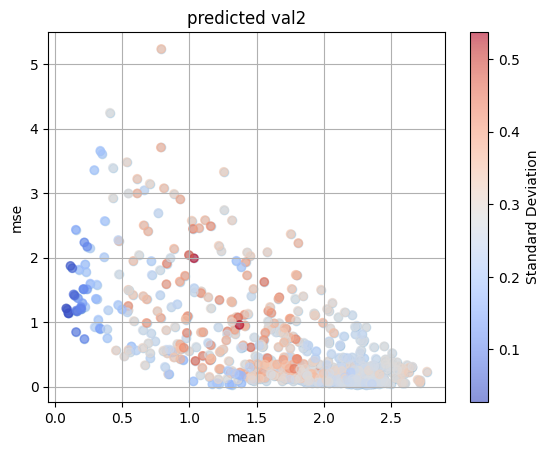

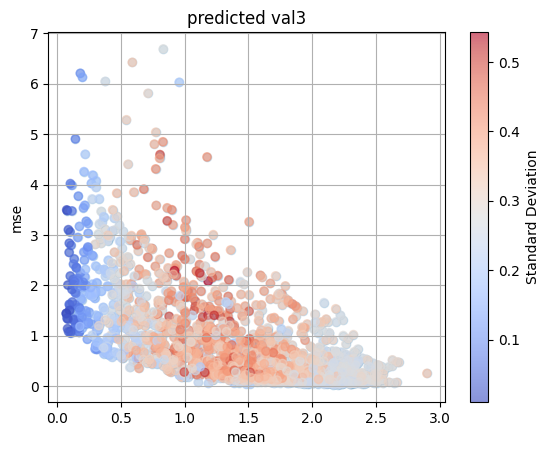

Pearson correlation coefficient for val2 macaque: 0.0515, p-value: 0.1856
Spearman correlation coefficient for val2 macaque: 0.1848, p-value: 1.689e-06
Pearson correlation coefficient for val3 macaque: -0.1325, p-value: 2.136e-08
Spearman correlation coefficient for val3 macaque: 0.0588, p-value: 0.01325


In [50]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
model='cq45eb2s'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_FOLDCHANGE.csv', header=None)
pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_FOLDCHANGE.csv', header=None, delim_whitespace=True)
add_stats(pred_baye)

val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val1_df = val1_df.replace(-1, 0)
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

baye_val1_df = pred_baye.head(val1_len)
baye_val2_df = pred_baye.iloc[val1_len:val1_len + val2_len]
baye_val3_df = pred_baye.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])
doubled_combined = doubled_combined.reset_index(drop=True)

pred_df = pred_df.reset_index(drop=True)
pred_baye = pred_baye.reset_index(drop=True)

doubled_combined = doubled_combined.to_frame(name='true')

doubled_combined.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined.loc[val1_len + val2_len:, 'label'] = 'val3'

combined = pd.concat([pred_baye, doubled_combined], axis=1)

squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
combined['mse'] = squared_errors.mean(axis=1)
combined['mean_diff'] = abs(combined['mean'] - combined['true'])

# bayesian_scatter(combined, 'mean', 'std')
bayesian_scatter(combined, 'mean', 'mse')
# bayesian_scatter(combined, 'std', 'mse')

correlations(combined[combined['label']=='val2']['std'], combined[combined['label']=='val2']['mse'], 'val2 macaque')
correlations(combined[combined['label']=='val3']['std'], combined[combined['label']=='val3']['mse'], 'val3 macaque')
# bayesian_scatter(combined, 'mean_diff', 'mse')
# bayesian_scatter(combined, 'mean_diff', 'std')

# threshold_correlate(combined, 'std', 0.3)
# print('\n')
# threshold_correlate(combined, 'std', 0.4)
# threshold_scatter(combined, 'std', 0.2)

Pearson correlation coefficient: 0.5221, p-value: 1.892e-170
Spearman correlation coefficient: 0.5097, p-value: 3.353e-161
None


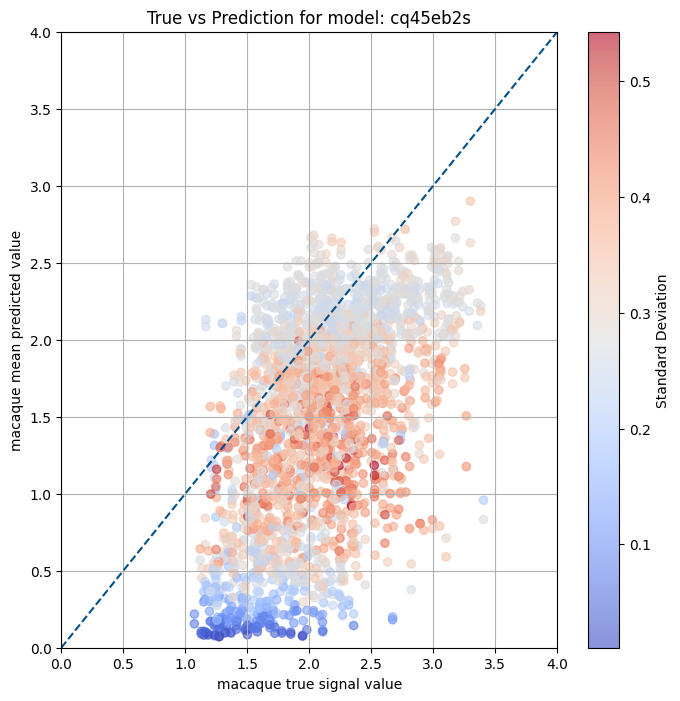

In [8]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
model='cq45eb2s'

# load all the DFs
# pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL_TRAIN.csv', header=None)
pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_FOLDCHANGE.csv', header=None, delim_whitespace=True)
add_stats(pred_baye)

val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val1_df = val1_df.replace(-1, 0)
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_baye) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

# pred_val1_df = pred_df.head(val1_len)
# pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
# pred_val3_df = pred_df.tail(val3_len)

baye_val1_df = pred_baye.head(val1_len)
baye_val2_df = pred_baye.iloc[val1_len:val1_len + val2_len]
baye_val3_df = pred_baye.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])
doubled_combined = doubled_combined.reset_index(drop=True)

# pred_df = pred_df.reset_index(drop=True)
pred_baye = pred_baye.reset_index(drop=True)

doubled_combined = doubled_combined.to_frame(name='true')

doubled_combined.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined.loc[val1_len + val2_len:, 'label'] = 'val3'

combined = pd.concat([pred_baye, doubled_combined], axis=1)

squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
combined['mse'] = squared_errors.mean(axis=1)
combined['mean_diff'] = abs(combined['mean'] - combined['true'])
# bayesian_scatter(combined, 'mean', 'std')
# bayesian_scatter(combined, 'mean', 'mse')
# bayesian_scatter(combined, 'std', 'mse')

# correlations(combined[combined['label']=='val2']['std'], combined[combined['label']=='val2']['mse'], 'val2 macaque')
# correlations(combined[combined['label']=='val3']['std'], combined[combined['label']=='val3']['mse'], 'val3 macaque')
# bayesian_scatter(combined, 'mean_diff', 'mse')
# bayesian_scatter(combined, 'mean_diff', 'std')

# threshold_correlate(combined, 'std', 0.3)
# print('\n')
# threshold_correlate(combined, 'std', 0.4)
# threshold_scatter(combined, 'std', 0.2)

posOnly = combined[val1_len:]
filtered = posOnly[posOnly['std'] < 0.9]
# x = combined['true'][val1_len:]
# y = combined['mean'][val1_len:]

x = filtered['true']
y = filtered['mean']

# x = filtered.loc[::2,'true']
# y = filtered.loc[::2,'pred']
    
print(pearson_spearman(x, y))
    
plt.figure(figsize=(8, 8))
# plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
sc = plt.scatter(x, y, c=filtered['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
# plt.scatter(x, y, alpha=0.2)
plt.xlabel(f'{species} true signal value')
plt.ylabel(f'{species} mean predicted value')
plt.title(f'True vs Prediction for model: {model}')
plt.grid(True)
plt.show()

In [39]:
combined

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,mean,range,std,true,label,mse,mean_diff
0,0.066583,0.183087,0.248912,0.086965,0.157107,0.126669,0.078911,0.111784,0.135806,0.058791,...,0.075086,0.271661,0.076546,0.155307,0.295861,0.069209,0.000000,val1,0.028681,0.155307
1,0.241252,0.066548,0.070330,0.134219,0.122639,0.115590,0.113583,0.098748,0.062179,0.102094,...,0.135691,0.103149,0.109452,0.135266,0.275241,0.068594,0.000000,val1,0.022774,0.135266
2,0.806629,0.141788,0.229461,0.333119,0.479420,0.713597,0.438736,0.512587,0.230644,0.564242,...,0.675043,0.217999,0.560052,0.435993,0.842643,0.224298,0.000000,val1,0.238641,0.435993
3,0.189759,0.234716,0.286015,0.637265,0.167323,0.304752,0.870563,0.250944,0.213365,0.184495,...,0.687725,0.480831,0.401394,0.460654,0.818887,0.225444,0.000000,val1,0.261846,0.460654
4,0.082882,0.084920,0.070065,0.083664,0.093832,0.066363,0.077603,0.066660,0.062516,0.065990,...,0.067532,0.066762,0.070421,0.070086,0.035869,0.008189,0.000000,val1,0.004962,0.070086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,2.381516,2.423404,2.424636,2.259408,2.407718,2.260770,2.654289,2.752774,2.515696,2.691929,...,1.988668,2.701239,2.559094,2.483263,1.064723,0.276991,1.934539,val3,0.348056,0.548725
13664,1.442733,1.699975,2.004881,1.725251,1.923768,1.867954,1.202385,1.605124,2.294788,2.045606,...,1.834611,1.962118,1.964189,1.890684,1.387354,0.289231,2.513549,val3,0.469024,0.622866
13665,2.076645,2.039039,1.864470,1.820113,1.361942,1.740923,1.896961,2.206419,2.107671,2.074654,...,1.753258,2.158799,1.803088,1.969319,1.043588,0.244771,2.513549,val3,0.343848,0.544230
13666,0.831616,1.014529,0.620913,0.549288,0.676829,0.879904,0.916340,0.766860,0.167505,0.482822,...,0.667699,0.114588,0.677727,0.688424,1.348095,0.356403,2.059611,val3,2.002464,1.371187


In [70]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def correlate():
    correlations(pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True), pd.concat([doubled_neg_df, doubled_val_df]).reset_index(drop=True), 'val pos+neg')
    correlations(pred_val_df, doubled_val_df, 'val, pos only')
    correlations(pred_train_df, doubled_train_df, 'train')
    

species='mouse'
# model='bdbi7l3n'
# model_list = ['cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8'] 
model_list=['cq45eb2s']
print('mouse')
for model in model_list:
    print(f'\n {model}')

    pred_val_train_mouse = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL_TRAIN.csv', header=None, sep='\t')
    
    neg_df = pd.read_csv(f'/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True)
    val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True)
    train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True)
    
    val1_len = 2*len(neg_df)
    val2_len = 2*len(val_df)
    val3_len = 2*len(train_df)
    
    # input sanity check
    if len(pred_val_train_mouse) != val1_len+val2_len+val3_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_neg_df = pred_val_train_mouse.head(val1_len)
    pred_val_df = pred_val_train_mouse.iloc[val1_len:val1_len + val2_len]
    pred_train_df = pred_val_train_mouse.tail(val3_len)

    pred_neg_pos_val_mouse = pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True)
    
    doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df]).reset_index(drop=True)

    doubled_combined_val_train = doubled_combined_val_train.rename(columns={0: 'chr', 3: 'mouse_peak', 4:'true'})
    add_stats(pred_val_train_mouse)
    
    mouse_combined = pd.concat([doubled_combined_val_train.reset_index(drop=True), pred_val_train_mouse.reset_index(drop=True)], axis=1)
    mouse_combined = mouse_combined.rename(columns={'mean': 'mean_pred'})
    # print(f'average neg val prediction: {pred_neg_df.mean()}')
    # correlate()

# def plotscatter():
#     scatter(pred_val_df, doubled_val_df, 'True vs predicted for val', 'True', 'Predicted')
#     scatter(pred_train_df, doubled_train_df, 'True vs predicted for train', 'True', 'Predicted')

# def ploth():
#     histogram(pred_neg_df, 'negative val predictions', 'Predicted signal')
#     histogram(pred_val_df, 'positive val predictions', 'Predicted signal')
#     histogram(pred_train_df, 'train predictions', 'Predicted signal')
    

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()
train_val_combined = mouse_combined[val1_len:]
train_val_combined.loc[::2, 'mean_pred_rc'] = (train_val_combined.loc[::2, 'mean_pred'].values + train_val_combined.loc[1::2, 'mean_pred'].values) / 2
train_val_combined = train_val_combined[::2]
train_val_combined.reset_index(drop=True)

mouse

 cq45eb2s


/tmp/ipykernel_15850/1674981837.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_combined.loc[::2, 'mean_pred_rc'] = (train_val_combined.loc[::2, 'mean_pred'].values + train_val_combined.loc[1::2, 'mean_pred'].values) / 2


,chr,1,2,mouse_peak,true,0,1,2,3,4,...,58,59,60,61,62,63,mean_pred,range,std,mean_pred_rc
0,chr8,3215633,3216133,peak19386,2.256366,2.218258,2.373012,2.243222,2.148520,2.279068,...,2.090756,2.315688,2.189873,2.206606,2.410569,2.335976,2.214408,0.921454,0.256499,2.214408
1,chr8,3227452,3227952,peak19387,1.676408,1.317037,1.279388,1.550702,0.628878,1.205291,...,1.263732,1.258039,1.297866,1.533260,0.804631,1.141013,1.371978,1.735511,0.366078,1.371978
2,chr8,3256127,3256627,peak19389,1.293518,1.770499,1.754579,1.526544,2.533422,2.414061,...,1.866648,2.040741,2.153010,2.295023,2.295880,2.273202,2.025306,1.237182,0.307759,2.025306
3,chr8,3256437,3256937,peak19388,1.658577,1.490706,1.107222,1.624810,1.744677,1.277620,...,0.549323,1.588762,1.509847,1.641097,0.746919,0.880364,1.116858,1.893286,0.461464,1.116858
4,chr8,3313760,3314260,peak19390,1.640423,1.861534,1.928891,1.545852,2.028529,1.628893,...,1.569472,2.260694,1.651720,1.306419,1.896967,1.426179,1.466572,1.609624,0.316780,1.466572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18261,chrX,169903661,169904161,peak22037,2.146267,2.358461,2.126517,2.365735,2.010407,1.936314,...,2.480311,2.379605,2.423193,2.275048,2.150319,2.370000,2.241716,1.461811,0.287832,2.241716
18262,chrX,169904084,169904584,peak22038,1.171128,0.123807,0.122539,0.229684,0.357964,0.089203,...,0.091699,0.196381,0.130294,0.208760,0.101682,0.175091,0.152479,0.289631,0.071373,0.152479
18263,chrX,169906007,169906507,peak22040,1.404790,0.527996,0.107953,0.362361,0.222997,0.088075,...,0.075480,0.193157,0.136435,0.224230,0.138028,0.292387,0.162756,0.459027,0.092086,0.162756
18264,chrX,169906208,169906708,peak22041,1.965940,1.099417,1.340185,1.085556,1.355898,0.998367,...,1.478676,1.406250,1.391254,1.358391,1.427191,1.667007,1.248559,1.141280,0.281134,1.248559


In [83]:
mouse_std_less_than_03 = train_val_combined[train_val_combined['std'] < 0.3]['mouse_peak'].to_frame()
mouse_std_less_than_03.to_csv('/home/azstephe/liverRegression/regression_liver/data/mouse_certainty/mouse_std_less_than_03_peaklist.csv', sep='\t', header=None, index=False)

In [85]:
mouse_std_more_than_03 = train_val_combined[train_val_combined['std'] >= 0.3]['mouse_peak']
mouse_std_more_than_03.to_csv('/home/azstephe/liverRegression/regression_liver/data/mouse_certainty/mouse_std_more_than_03_peaklist.csv', sep='\t', header=None, index=False)

In [88]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

    print('\n')
    correlations(pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True), pd.concat([doubled_neg_df, doubled_val_df]).reset_index(drop=True), 'val pos+neg')
    correlations(pred_val_df, doubled_val_df, 'val, pos only')
    correlations(pred_train_df, doubled_train_df, 'train, pos only')
    
# species='cow'
# model='cq45eb2s'
species_list = ['macaque', 'rat', 'cow', 'pig']
# model_list = ['cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8'] 
model_list = ['t1e5p40r', 'kf8188qf', 'r19ftp2z'] 
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        neg = 'nonMacaque_liver_andRat_andCow_andPig_VAL_500bp.bed'
        if species == 'rat':
            neg = 'nonRat_liver_andMacaque_andCow_andPig_VAL_500bp.bed'
        elif species == 'cow':
            neg = 'nonCow_liver_andMacaque_andRat_andPig_VAL_500bp.bed'
        elif species == 'pig':
            neg = 'nonPig_liver_andMacaque_andRat_andCow_VAL_500bp.bed'
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_FOLDCHANGE.csv', header=None)
        
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        val3_len = 2*len(val3_df)
        
        # input sanity check
        if len(pred_df) != val1_len+val2_len+val3_len:
            print("ERROR: predictions are a different length than validation sets")
        
        doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val1_df = pred_df.head(val1_len)
        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
        pred_val3_df = pred_df.tail(val3_len)
        
        doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

        print(f'average val1 prediction: {pred_val1_df.mean()}')
        #############
        pred_val_train = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL_TRAIN.csv', header=None)
        
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/negatives/'+neg, header=None, delim_whitespace=True).iloc[:,4]
        val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(neg_df)
        val2_len = 2*len(val_df)
        val3_len = 2*len(train_df)
        
        # input sanity check
        if len(pred_val_train) != val1_len+val2_len+val3_len:
            print("ERROR: predictions are a different length than validation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_neg_df = pred_val_train.head(val1_len)
        pred_val_df = pred_val_train.iloc[val1_len:val1_len + val2_len]
        pred_train_df = pred_val_train.tail(val3_len)
        
        doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df])

        print(f'average neg val prediction: {pred_neg_df.mean()}')
        correlate()


# def plotscatter():
#     # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
#     scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
#     scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')
#     scatter(pred_val_df, doubled_val_df, 'True vs predicted for val', 'True', 'Predicted')
#     scatter(pred_train_df, doubled_train_df, 'True vs predicted for train', 'True', 'Predicted')

# def ploth():
#     histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
#     histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
#     histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

#     histogram(pred_neg_df, 'negative val predictions', 'Predicted signal')
#     histogram(pred_val_df, 'positive val predictions', 'Predicted signal')
#     histogram(pred_train_df, 'train predictions', 'Predicted signal')
    

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()



macaque

t1e5p40r
average val1 prediction: 0    0.395021
dtype: float64
average neg val prediction: 0    0.460353
dtype: float64
Pearson correlation coefficient for all: 0.6176, p-value: 0
Spearman correlation coefficient for all: 0.4795, p-value: 0
Pearson correlation coefficient for val2: 0.5458, p-value: 1.151e-52
Spearman correlation coefficient for val2: 0.4985, p-value: 7.157e-43
Pearson correlation coefficient for val3: 0.4490, p-value: 1.003e-88
Spearman correlation coefficient for val3: 0.4423, p-value: 7.41e-86


Pearson correlation coefficient for val pos+neg: 0.6929, p-value: 0
Spearman correlation coefficient for val pos+neg: 0.7009, p-value: 0
Pearson correlation coefficient for val, pos only: 0.4710, p-value: 5.951e-197
Spearman correlation coefficient for val, pos only: 0.4589, p-value: 8.366e-186
Pearson correlation coefficient for train, pos only: 0.5121, p-value: 0
Spearman correlation coefficient for train, pos only: 0.5059, p-value: 0

kf8188qf
average val1 predic

In [23]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def correlate():
    correlations(pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True), pd.concat([doubled_neg_df, doubled_val_df]).reset_index(drop=True), 'val pos+neg')
    correlations(pred_val_df, doubled_val_df, 'val, pos only')
    correlations(pred_train_df, doubled_train_df, 'train')
    

species='mouse'
# model='bdbi7l3n'
# model_list = ['cq45eb2s', '584e37fx', 'pl0eibis', 'baa0j5fp', 'dtbxi7l8'] 
model_list=['cq45eb2s'] 
print('mouse')
for model in model_list:
    print(f'\n {model}')


    pred_val_train = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL_TRAIN.csv', header=None,sep = '\t')
    add_stats(pred_val_train)
    neg_df = pd.read_csv(f'/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
    val1_len = 2*len(neg_df)
    val2_len = 2*len(val_df)
    val3_len = 2*len(train_df)
        
        # input sanity check
    if len(pred_val_train) != val1_len+val2_len+val3_len:
        print("ERROR: predictions are a different length than validation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_neg_df = pred_val_train.head(val1_len)
    pred_val_df = pred_val_train.iloc[val1_len:val1_len + val2_len]
    pred_train_df = pred_val_train.tail(val3_len)
        
    doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df])

    print(f'average neg val prediction: {pred_neg_df.mean()}')
    correlate()


# def plotscatter():
#     # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
#     scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
#     scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')
#     scatter(pred_val_df, doubled_val_df, 'True vs predicted for val', 'True', 'Predicted')
#     scatter(pred_train_df, doubled_train_df, 'True vs predicted for train', 'True', 'Predicted')

# def ploth():
#     histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
#     histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
#     histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

#     histogram(pred_neg_df, 'negative val predictions', 'Predicted signal')
#     histogram(pred_val_df, 'positive val predictions', 'Predicted signal')
#     histogram(pred_train_df, 'train predictions', 'Predicted signal')
    

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
# plotscatter()


mouse

 cq45eb2s
average neg val prediction: 0        0.473838
1        0.479196
2        0.473538
3        0.476171
4        0.471438
           ...   
62       0.476144
63       0.472724
mean     0.475973
range    0.789952
std      0.178340
Length: 67, dtype: float64


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

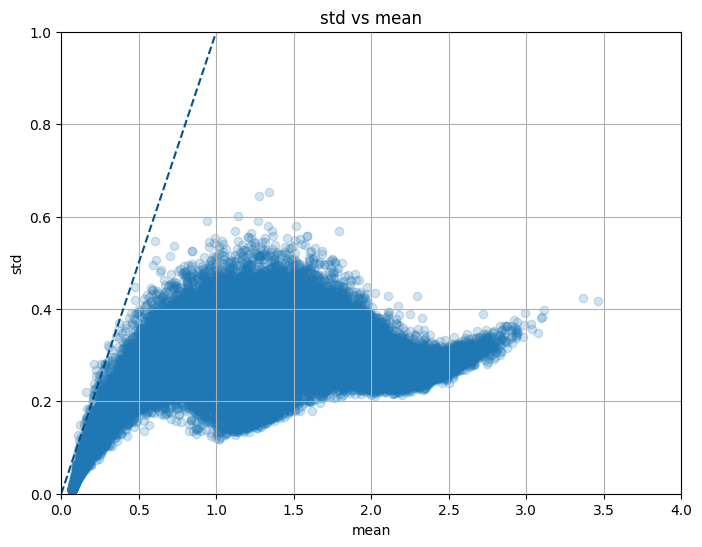

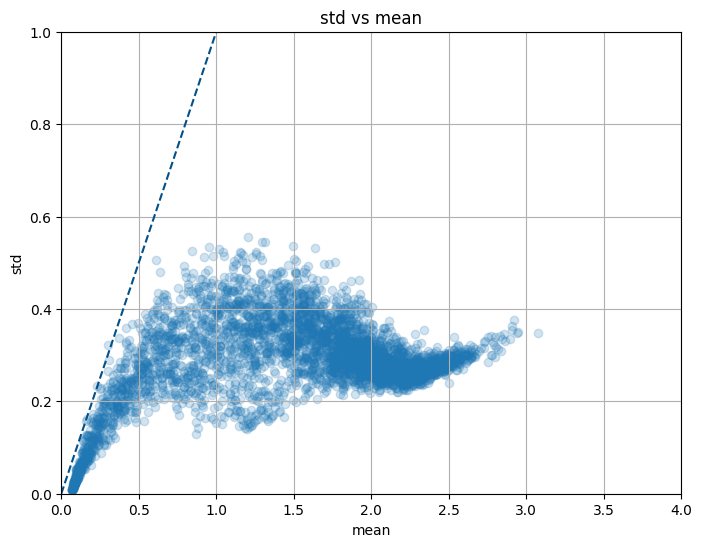

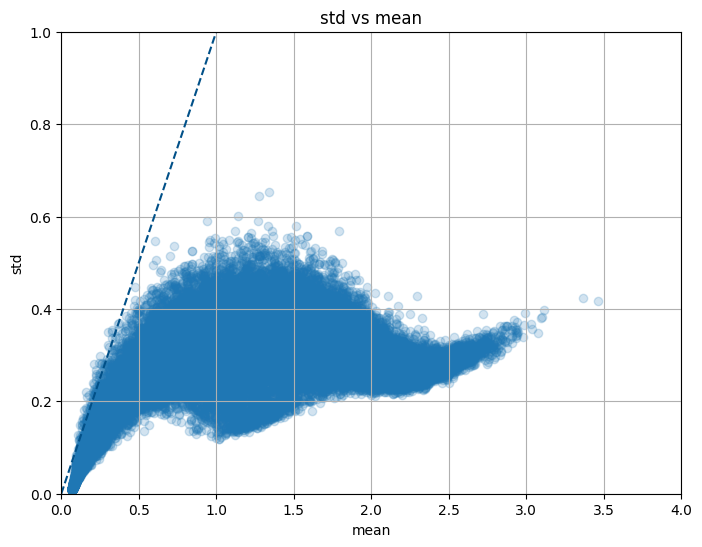

In [27]:
df = pred_val_train[val1_len:]
df2 = pred_val_train.iloc[val1_len:val1_len + val2_len]
def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 1)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

scatter(df['std'], df['mean'], 'std vs mean', 'mean', 'std')
scatter(df2['std'], df2['mean'], 'std vs mean', 'mean', 'std')
scatter(pred_val_train['std'], pred_val_train['mean'], 'std vs mean', 'mean', 'std')

Pearson correlation coefficient: 0.6498, p-value: 0
Spearman correlation coefficient: 0.6421, p-value: 0
None


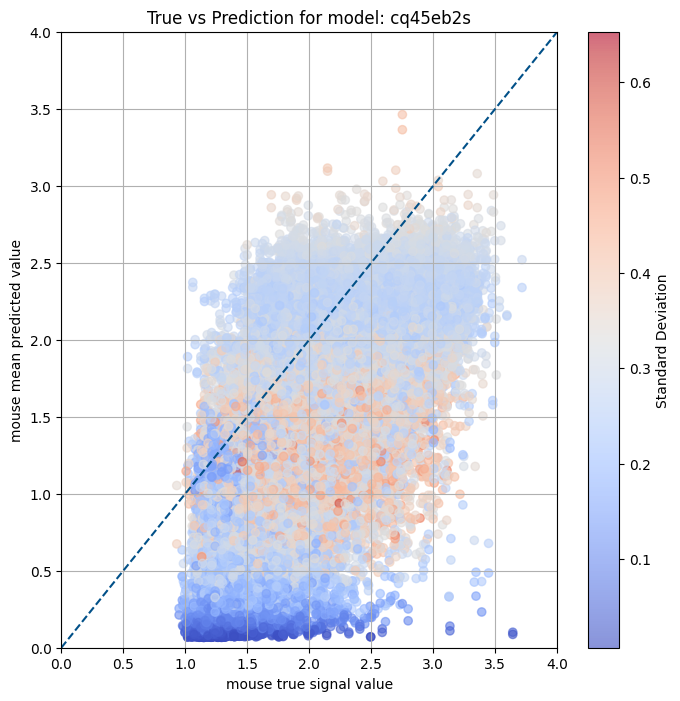

In [32]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='mouse'
model='cq45eb2s'

# load all the DFs
# pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL_TRAIN.csv', header=None)
pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL_TRAIN.csv', header=None, delim_whitespace=True)
add_stats(pred_baye)

val1_df = pd.read_csv(f'/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
val1_df = val1_df.replace(-1, 0)
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_baye) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

# pred_val1_df = pred_df.head(val1_len)
# pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
# pred_val3_df = pred_df.tail(val3_len)

baye_val1_df = pred_baye.head(val1_len)
baye_val2_df = pred_baye.iloc[val1_len:val1_len + val2_len]
baye_val3_df = pred_baye.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])
doubled_combined = doubled_combined.reset_index(drop=True)

# pred_df = pred_df.reset_index(drop=True)
pred_baye = pred_baye.reset_index(drop=True)

doubled_combined = doubled_combined.to_frame(name='true')

doubled_combined.loc[0:val1_len-1, 'label'] = 'val1'
doubled_combined.loc[val1_len:val1_len + val2_len - 1, 'label'] = 'val2'
doubled_combined.loc[val1_len + val2_len:, 'label'] = 'val3'

combined = pd.concat([pred_baye, doubled_combined], axis=1)

squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
combined['mse'] = squared_errors.mean(axis=1)
combined['mean_diff'] = abs(combined['mean'] - combined['true'])
# bayesian_scatter(combined, 'mean', 'std')
# bayesian_scatter(combined, 'mean', 'mse')
# bayesian_scatter(combined, 'std', 'mse')

# correlations(combined[combined['label']=='val2']['std'], combined[combined['label']=='val2']['mse'], 'val2 macaque')
# correlations(combined[combined['label']=='val3']['std'], combined[combined['label']=='val3']['mse'], 'val3 macaque')
# bayesian_scatter(combined, 'mean_diff', 'mse')
# bayesian_scatter(combined, 'mean_diff', 'std')

# threshold_correlate(combined, 'std', 0.3)
# print('\n')
# threshold_correlate(combined, 'std', 0.4)
# threshold_scatter(combined, 'std', 0.2)

posOnly = combined[val1_len:]
filtered = posOnly[posOnly['std'] < 0.9]
# x = combined['true'][val1_len:]
# y = combined['mean'][val1_len:]

x = filtered['true']
y = filtered['mean']

# x = filtered.loc[::2,'true']
# y = filtered.loc[::2,'pred']
    
print(pearson_spearman(x, y))
    
plt.figure(figsize=(8, 8))
# plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
sc = plt.scatter(x, y, c=filtered['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
# plt.scatter(x, y, alpha=0.2)
plt.xlabel(f'{species} true signal value')
plt.ylabel(f'{species} mean predicted value')
plt.title(f'True vs Prediction for model: {model}')
plt.grid(True)
plt.show()

In [26]:
len(pred_val_train)

41706